Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [493]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [494]:
X = np.array([[0], [1], [2], [4]])
y = np.array([[4], [1], [2], [5]])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [495]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
polynom_d = PolynomialFeatures(degree=1, interaction_only=False, include_bias=True, order='C')
fi_X = polynom_d.fit_transform(X)
print(fi_X)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [496]:
from numpy import linalg
# Vaš kôd ovdje
print("Rang matrice dizajna od X je {}.".format(linalg.matrix_rank(fi_X)))
fi_X_t = fi_X.T
gram_matrix = np.dot(fi_X_t, fi_X)
p_inv_classic = np.dot(linalg.inv(gram_matrix), fi_X_t) 
w_classic = np.dot(p_inv_classic, y)
p_inv_linalg = linalg.pinv(fi_X)
w_linalg = np.dot(p_inv_linalg, y)
print("Težine (T) izračunate klasičnim putem: {}".format(w_classic.T))
print("Težine (T) izračunate pomoću linalg:   {}".format(w_linalg.T))

Rang matrice dizajna od X je 2.
Težine (T) izračunate klasičnim putem: [[2.2        0.45714286]]
Težine (T) izračunate pomoću linalg:   [[2.2        0.45714286]]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

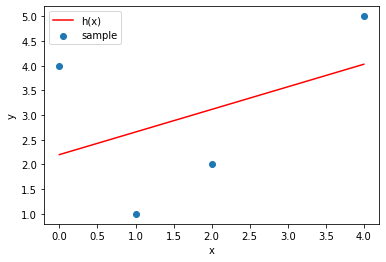

E(h|D): 4.085714285714286
MSE   : 2.042857142857143


In [497]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
h = np.dot(fi_X, w_linalg)
plt.scatter(X, y, label="sample")
plt.plot(X, h, color="red", label="h(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
print("E(h|D): {}".format(0.5 * np.sum(np.power(y - h, 2))))
print("MSE   : {}".format(mean_squared_error(y, h)))

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [498]:
# Vaš kôd ovdje
try:
    np.dot(linalg.inv(fi_X), y)
except Exception as e:
    print("Došlo je do pogreške jer dizajn matrica od X nije kvadratna! ({})".format(e))

#polynom_d.set_params(degree=3)
#fi_X_test = polynom_d.fit_transform(X);
#print("Dizajn matrica nakon proširenja u 3+1 prostor:")
#print(fi_X_test)
#print("Izračun težina nakon proširenja: {}".format(np.dot(linalg.inv(fi_X_test), y).T))

Došlo je do pogreške jer dizajn matrica od X nije kvadratna! (Last 2 dimensions of the array must be square)


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

Težine (T) izračunate pomoću LinearRegression:   [[2.2        0.45714286]]
Težine (T) izračunate klasičnim putem:           [[2.2        0.45714286]]
Težine (T) izračunate pomoću linalg:             [[2.2        0.45714286]]
MSE: 2.042857142857143


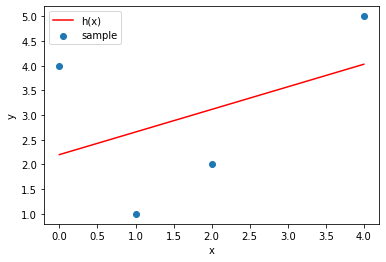

In [499]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
regression = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
polynom_d.set_params(degree=1, include_bias=False)
fi_X = polynom_d.fit_transform(X)
regression.fit(fi_X, y)
w_regression = np.concatenate(([regression.intercept_], regression.coef_))
print("Težine (T) izračunate pomoću LinearRegression:   {}".format(w_regression.T))
print("Težine (T) izračunate klasičnim putem:           {}".format(w_classic.T))
print("Težine (T) izračunate pomoću linalg:             {}".format(w_linalg.T))
print("MSE: {}".format(mean_squared_error(y, regression.predict(fi_X))))
plt.scatter(fi_X, y, label="sample")
plt.plot(fi_X, regression.predict(fi_X), color="red", label="h(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [500]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    return f(X) + normal(0, noise, X.shape)
    #return np.array([f(X[row,:]) + normal(0, noise)
                     #for row in range(0, np.shape(X)[0])])

In [501]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [502]:
def func(x):
    return 5 + x - 2*x*x - 5*x*x*x

In [503]:
# Vaš kôd ovdje
X_ = make_instances(-5, 5, 50)
y_ = make_labels(X_, func, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

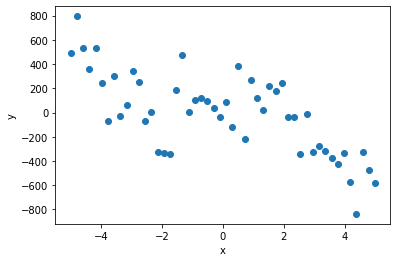

In [504]:
# Vaš kôd ovdje
plt.scatter(X_, y_)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

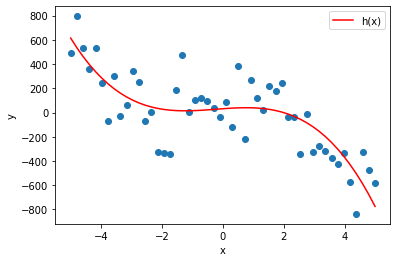

MSE: 37833.49911608515


In [505]:
# Vaš kôd ovdje
polynom_d.set_params(degree=3)
fi_X_ = polynom_d.fit_transform(X_)
regression.fit(fi_X_, y_)
h = regression.predict(fi_X_)
plt.scatter(X_, y_)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X_, h, color="red", label="h(x)")
plt.legend()
plt.show()
print("MSE: {}".format(mean_squared_error(y_, h)))

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

E(h1|D) = 54837.2326699687
E(h3|D) = 37833.49911608515
E(h5|D) = 31615.593661750987
E(h10|D) = 30886.63143843101
E(h20|D) = 17471.324998254146


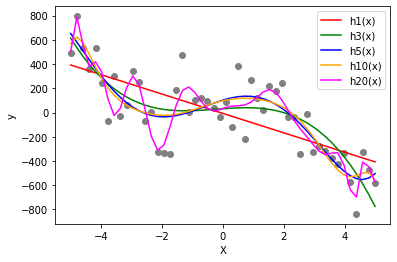

In [506]:
# Vaš kôd ovdje
degrees_list = [1, 3, 5, 10, 20]
colors = ["red", "green", "blue", "orange", "magenta"]
for d, c in zip(degrees_list, colors):
    polynom_d.set_params(degree=d)
    fi_X_ = polynom_d.fit_transform(X_)
    regression.fit(fi_X_, y_)
    h = regression.predict(fi_X_)
    plt.plot(X_, h, color = c, label="h{}(x)".format(d))
    print("E(h{}|D) = {}".format(d, mean_squared_error(y_, h)))
plt.scatter(X_, y_, color="grey")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

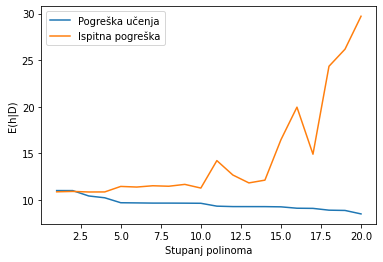

In [507]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.5)
errors_train = []
errors_test = []
degrees_list = [d for d in range(1, 21)]
for d in degrees_list:
    polynom_d.set_params(degree=d)
    fi_train = polynom_d.fit_transform(X_train)
    fi_test = polynom_d.fit_transform(X_test)
    regression.fit(fi_train, y_train)
    mse_train = mean_squared_error(y_train, regression.predict(fi_train))
    mse_test = mean_squared_error(y_test, regression.predict(fi_test))
    errors_train.append(np.log(mse_train))
    errors_test.append(np.log(mse_test))
plt.plot(degrees_list, errors_train, label="Pogreška učenja")
plt.plot(degrees_list, errors_test, label="Ispitna pogreška")
plt.xlabel("Stupanj polinoma")
plt.ylabel("E(h|D)")
plt.legend()
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

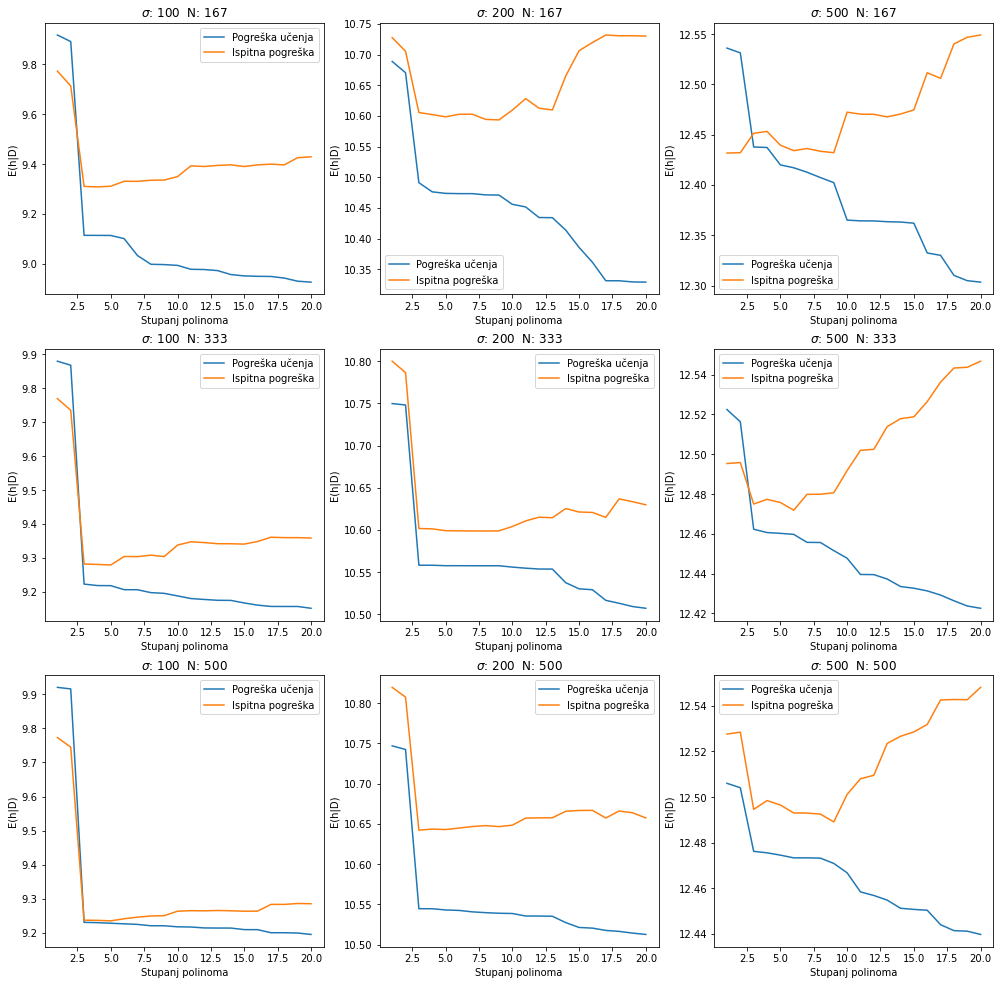

In [508]:
# Vaš kôd ovdje
percentages_list = [1/3, 2/3, 1]
noises_list = [100, 200, 500]
degrees_list = [d for d in range(1, 21)]
X_ = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X_, test_size=0.5)
y_train_list = [make_labels(X_train, func, noise) for noise in noises_list]
y_test_list = [make_labels(X_test, func, noise) for noise in noises_list]
fig, axarr = plt.subplots(3, 3, figsize=(17, 17))
num_of_rows = X_train.shape[0]
for i, p in enumerate(percentages_list):
    # calculate samples size using percentages_list and number of rows
    samples_size = round(num_of_rows * p)
    # find UNIQUE random rows for training/testing
    #rand_rows = np.random.choice(num_of_rows, size=samples_size, replace=False)
    X_train_p = X_train[0:samples_size]
    X_test_p = X_test[0:samples_size]
    for j, (y_train, y_test) in enumerate(zip(y_train_list, y_test_list)):
        y_train_p = y_train[0:samples_size]
        y_test_p = y_test[0:samples_size]
        errors_train = []
        errors_test = []
        for d in degrees_list:
            polynom_d.set_params(degree=d)
            fi_train_p = polynom_d.fit_transform(X_train_p)
            fi_test_p = polynom_d.fit_transform(X_test_p)
            regression.fit(fi_train_p, y_train_p)
            mse_train_p = mean_squared_error(y_train_p, regression.predict(fi_train_p))
            mse_test_p = mean_squared_error(y_test_p, regression.predict(fi_test_p))
            errors_train.append(np.log(mse_train_p))
            errors_test.append(np.log(mse_test_p))
        axarr[i, j].plot(degrees_list, errors_train, label="Pogreška učenja")
        axarr[i, j].plot(degrees_list, errors_test, label="Ispitna pogreška")
        axarr[i, j].set_title("$\sigma$: {}  N: {}".format(noises_list[j], samples_size))
        axarr[i, j].set_xlabel("Stupanj polinoma")
        axarr[i, j].set_ylabel("E(h|D)")
        axarr[i, j].legend()
plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [509]:
# Vaš kôd ovdje
polynom_d.set_params(degree=3, include_bias=True)
fi_X = polynom_d.fit_transform(X)
fi_X_t = fi_X.T
for l in [0, 1, 10]:
    gram_matrix = np.dot(fi_X_t, fi_X)
    regularization_matrix = l * np.identity(gram_matrix.shape[0])
    regularization_matrix[0, 0] = 0 # w0 is not regularized
    gram_matrix_reg = gram_matrix + regularization_matrix
    gram_matrix_reg_inv = linalg.inv(gram_matrix_reg)
    print("Težine za lambda = {:2}: {}".format(l, np.dot(np.dot(gram_matrix_reg_inv, fi_X_t), y).T))

Težine za lambda =  0: [[ 4.         -5.91666667  3.375      -0.45833333]]
Težine za lambda =  1: [[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]]
Težine za lambda = 10: [[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [510]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
ridge = Ridge()
polynom_d.set_params(include_bias=False)
fi_X = polynom_d.fit_transform(X)
for l in [0, 1, 10]:
    ridge.set_params(alpha=l)
    ridge.fit(fi_X, y)
    print("Težine za lambda = {:2}: {}".format(l, np.insert(ridge.coef_, 0, ridge.intercept_, axis=1)))

Težine za lambda =  0: [[ 4.         -5.91666667  3.375      -0.45833333]]
Težine za lambda =  1: [[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]]
Težine za lambda = 10: [[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

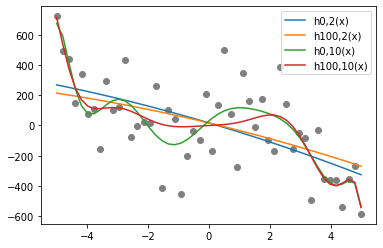

In [511]:
# Vaš kôd ovdje
X_ = make_instances(-5, 5, 50)
y_ = make_labels(X_, func, 200)
for d in [2, 10]:
    polynom_d.set_params(degree=d)
    fi_X_ = polynom_d.fit_transform(X_)
    for l in [0, 100]:
        ridge.set_params(alpha=l)
        ridge.fit(fi_X_, y_)
        plt.plot(X_, ridge.predict(fi_X_), label="h{},{}(x)".format(l, d))
plt.scatter(X_, y_, color="grey")
plt.legend()
plt.show()

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


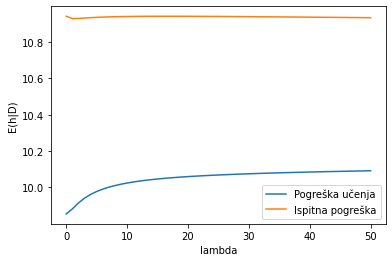

In [512]:
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.5)
polynom_d.set_params(degree=10)
fi_train = polynom_d.fit_transform(X_train)
fi_test = polynom_d.fit_transform(X_test)
errors_train = []
errors_test = []
lambdas = [l for l in range(51)]
for l in lambdas:
    ridge.set_params(alpha=l)
    ridge.fit(fi_train, y_train)
    mse_train = mean_squared_error(y_train, ridge.predict(fi_train))
    mse_test = mean_squared_error(y_test, ridge.predict(fi_test))
    errors_train.append(np.log(mse_train))
    errors_test.append(np.log(mse_test))
plt.plot(lambdas, errors_train, label="Pogreška učenja")
plt.plot(lambdas, errors_test, label="Ispitna pogreška")
plt.xlabel("lambda")
plt.ylabel("E(h|D)")
plt.legend()
plt.show()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [513]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

def l1_reg(coef):
    return np.sum(np.absolute(coef))

def l2_reg(coef):
    return np.sqrt(np.sum(np.square(coef)))

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

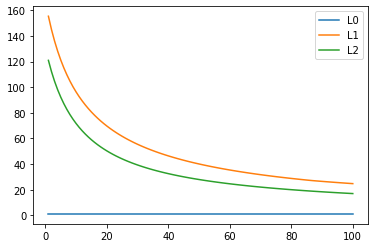

0.98


In [514]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.5)
polynom_d.set_params(degree=5)
fi_train = polynom_d.fit_transform(X_train)
lambdas = [l for l in range(1, 101)]
l0 = []
l1 = []
l2 = []
for l in lambdas:
    ridge.set_params(alpha=l)
    ridge.fit(fi_train, y_train)
    l0.append(nonzeroes(ridge.coef_))
    l1.append(l1_reg(ridge.coef_))
    l2.append(l2_reg(ridge.coef_))
plt.plot(lambdas, l0, label="L0")
plt.plot(lambdas, l1, label="L1")
plt.plot(lambdas, l2, label="L2")
plt.legend()
plt.show()
print((50 - l0[-1]) / 50)

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

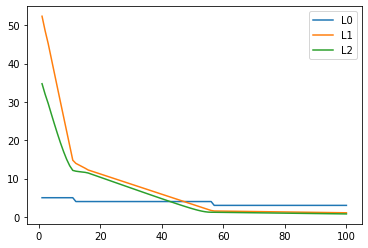

0.94


In [515]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.5)
polynom_d.set_params(degree=5)
fi_train = polynom_d.fit_transform(X_train)
lambdas = [l for l in range(1, 101)]
l0 = []
l1 = []
l2 = []
lasso = Lasso()
for l in lambdas:
    lasso.set_params(alpha=l, max_iter=10000)
    lasso.fit(fi_train, y_train)
    l0.append(nonzeroes(lasso.coef_))
    l1.append(l1_reg(lasso.coef_))
    l2.append(l2_reg(lasso.coef_))
plt.plot(lambdas, l0, label="L0")
plt.plot(lambdas, l1, label="L1")
plt.plot(lambdas, l2, label="L2")
plt.legend()
plt.show()
print((50 - l0[-1]) / 50)

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [516]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

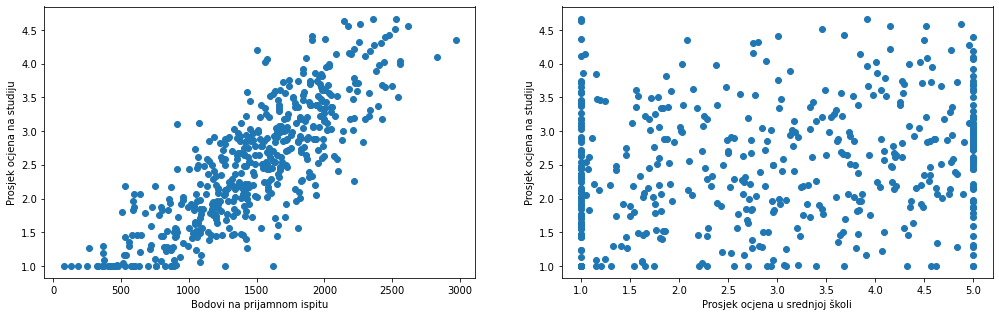

In [517]:
# Vaš kôd ovdje
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5))

ax1.scatter(exam_score, grades_y)
ax1.set_xlabel("Bodovi na prijamnom ispitu")
ax1.set_ylabel("Prosjek ocjena na studiju")

ax2.scatter(grade_in_highschool, grades_y)
ax2.set_xlabel("Prosjek ocjena u srednjoj školi")
ax2.set_ylabel("Prosjek ocjena na studiju")

plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [518]:
# Vaš kôd ovdje
ridge.set_params(alpha=0.01)
ridge.fit(grades_X, grades_y)
print(ridge.coef_)

[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [519]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape((-1, 1)))

ridge.fit(grades_X_fixed, grades_y_fixed)

print(ridge.coef_)

[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [520]:
# Vaš kôd ovdje
num_of_cols = np.shape(grades_X_fixed)[1]
grades_X_fixed_colinear = np.insert(grades_X_fixed, num_of_cols-1, grades_X_fixed[:, num_of_cols-1], axis=1)

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [521]:
# Vaš kôd ovdje
ridge.fit(grades_X_fixed_colinear, grades_y_fixed)
print(ridge.coef_)

[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [522]:
# Vaš kôd ovdje
ridge_001 = Ridge(0.01)
coef_001 = []
ridge_1000 = Ridge(1000)
coef_1000 = []
percent = 0.5
for i in range(10):
    samples_size = round(percent * np.shape(grades_y)[0])
    rand_rows = np.random.choice(np.shape(grades_y)[0], size=samples_size, replace=False)
    samples_50 = grades_X_fixed_colinear[rand_rows]
    y_50 = grades_y_fixed[rand_rows]
    ridge_001.fit(samples_50, y_50)
    coef_001.append(ridge_001.coef_)
    ridge_1000.fit(samples_50, y_50)
    coef_1000.append(ridge_1000.coef_)
print("Lambda 0.01:")
for c in coef_001:
    print(c)
print()
print("Lambda 1000:")
for c in coef_1000:
    print(c)
print()
print("Std:")
print(np.std(coef_001, axis=0))
print(np.std(coef_1000, axis=0))

Lambda 0.01:
[[0.84344967 0.08902444 0.08902444]]
[[0.82496436 0.0743091  0.0743091 ]]
[[0.81998306 0.07417031 0.07417031]]
[[0.79865227 0.07669605 0.07669605]]
[[0.83814641 0.06956705 0.06956705]]
[[0.82458024 0.10887909 0.10887909]]
[[0.82753018 0.08767275 0.08767275]]
[[0.81999026 0.0856458  0.0856458 ]]
[[0.810926  0.1092402 0.1092402]]
[[0.81087976 0.0769835  0.0769835 ]]

Lambda 1000:
[[0.16419725 0.02816756 0.02816756]]
[[0.16837778 0.04200572 0.04200572]]
[[0.16675609 0.03992155 0.03992155]]
[[0.16232085 0.03253696 0.03253696]]
[[0.17099764 0.03987356 0.03987356]]
[[0.15003014 0.03454006 0.03454006]]
[[0.17269709 0.04318487 0.04318487]]
[[0.1670921 0.0357689 0.0357689]]
[[0.16044761 0.05071806 0.05071806]]
[[0.16131422 0.03525785 0.03525785]]

Std:
[[0.01251503 0.01335683 0.01335683]]
[[0.00613993 0.00602063 0.00602063]]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.